In [1]:
import pandas as pd
from numpy import array
import tensorflow
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import data_preprocessing
from data_preprocessing import *

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorf

In [2]:
trainPath='/home/siva/Desktop/ml/liar_dataset/train.tsv'
testPath='/home/siva/Desktop/ml/liar_dataset/test.tsv'
validationPath='/home/siva/Desktop/ml/liar_dataset/valid.tsv'
X_train,y,X_test,testY,val,valY=data_preprocess(trainPath,testPath,validationPath,pred="single")

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
val = tokenizer.texts_to_sequences(val)
vocab_size = len(tokenizer.word_index) + 1

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
val = pad_sequences(val, padding='post', maxlen=maxlen)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open( r"/home/siva/Desktop/ml/glove.6B.100d.txt", encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
print(LSTM_Layer_1.shape)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])






Instructions for updating:
keep_dims is deprecated, use keepdims instead


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  te

(?, 128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 100)          624800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 742,177
Trainable params: 117,377
Non-trainable params: 624,800
_________________________________________________________________
None


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
history = model.fit(X_train, y, epochs=5,validation_data=(val,valY))

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:

Train on 6724 samples, validate on 861 samples
Epoch 1/5
6724/6724 [==============================] - 66s 10ms/step - loss: 0.5216 - acc: 0.7973 - val_loss: 0.5054 - val_acc: 0.7991
Epoch 2/5
6724/6724 [==============================] - 72s 11ms/step - loss: 0.5064 - acc: 0.7973 - val_loss: 0.5017 - val_acc: 0.7991
Epoch 3/5
6724/6724 [==============================] - 73s 11ms/step - loss: 0.5054 - acc: 0.7973 - val_loss: 0.5049 - val_acc: 0.7991
Epoch 4/5
6724/6724 [==============================] - 74s 11ms/step - loss: 0.5053 - acc: 0.7973 - val_loss: 0.5018 - val_acc: 0.7991
Epoch 5/5
6724/6724 [==============================] - 75s 11ms/step - loss: 0.5058 - acc: 0.7973 - val_loss: 0.5029 - val_acc: 0.7991


In [8]:
score = model.evaluate(X_test, testY, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

 64/853 [=>............................] - ETA: 1s

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


853/853 [==============================] - 2s 2ms/step
Test Score: 0.5057630752413103
Test Accuracy: 0.7971864012173723


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


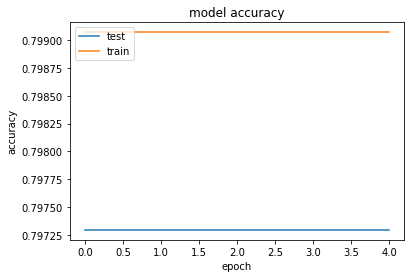

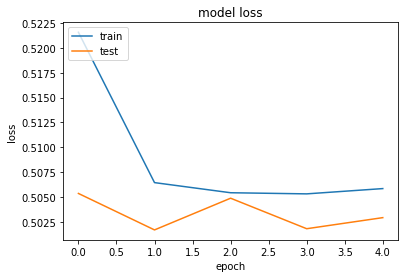

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test','train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [10]:
yhat=model.predict(X_test)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,plot_confusion_matrix
print(classification_report(testY, yhat.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       680
           1       0.00      0.00      0.00       173

    accuracy                           0.80       853
   macro avg       0.40      0.50      0.44       853
weighted avg       0.64      0.80      0.71       853



/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


======Confusion Matrix======

 [[680   0]
 [173   0]]


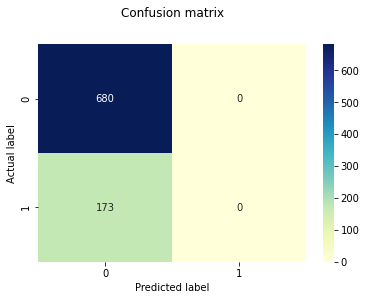

In [12]:
import seaborn as sns
def confusionMatrix(testset,predicted):
    #Confusion matrix
    print("======Confusion Matrix======")
    matrix = confusion_matrix(testset,predicted)
    print('\n',matrix)

    pd.crosstab(np.array(predicted), np.array(testset), rownames=['Actual'], colnames=['Predicted'], margins=True)

    p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
confusionMatrix(testY, yhat.argmax(axis=1))